In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covid = pd.read_csv('us-counties-2020.csv')

In [4]:
covid[(covid['county'] == 'Unknown') & (covid['date'] == '2020-12-31')]

,date,county,state,fips,cases,deaths
881582,2020-12-31,Unknown,Alaska,NaN,218,0.0
881672,2020-12-31,Unknown,Arkansas,NaN,2819,0.0
881807,2020-12-31,Unknown,Connecticut,NaN,665,0.0
881812,2020-12-31,Unknown,Delaware,NaN,136,0.0
881877,2020-12-31,Unknown,Florida,NaN,3010,0.0
882026,2020-12-31,Unknown,Georgia,NaN,3623,6.0
882042,2020-12-31,Unknown,Guam,NaN,8286,123.0
882374,2020-12-31,Unknown,Iowa,NaN,694,0.0
882484,2020-12-31,Unknown,Kansas,NaN,0,408.0
882668,2020-12-31,Unknown,Louisiana,NaN,399,0.0


In [5]:
covid = covid[covid['county'] != 'Unknown']

In [6]:
covid['county_state'] = covid['county'] + ", " + covid['state']
covid

,date,county,state,fips,cases,deaths,county_state
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,"Cook, Illinois"
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,"Snohomish, Washington"
...,...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0,"Sweetwater, Wyoming"
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0,"Teton, Wyoming"
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0,"Uinta, Wyoming"
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0,"Washakie, Wyoming"


In [7]:
covid['county'].describe()

count         877254
unique          1929
top       Washington
freq            8777
Name: county, dtype: object

In [8]:
covid['state'].describe()

count     877254
unique        54
top        Texas
freq       67001
Name: state, dtype: object

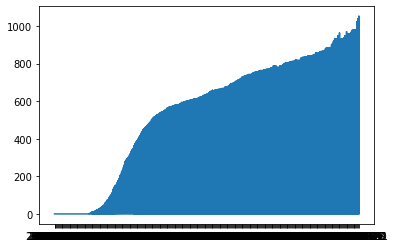

In [9]:
washington_data = covid[covid['state']=='Washington']
plt.plot(washington_data['date'],washington_data['deaths']);

In [10]:
def extract_time_range_data(start_date,end_date):
    diff_deaths = covid[covid['date'] == end_date].set_index('county_state')['deaths'] - covid[covid['date'] == start_date].set_index('county_state')['deaths']
    diff_cases = covid[covid['date'] == end_date].set_index('county_state')['cases'] - covid[covid['date'] == start_date].set_index('county_state')['cases']
    df = covid[covid['date'] == end_date].set_index('county_state')
    df['new_cases'] = diff_cases
    df['new_deaths'] = diff_deaths
    df.drop('cases',inplace=True,axis=1)
    df.drop('deaths',inplace=True,axis=1)
    df.drop('date',inplace=True,axis=1)
    return df

In [36]:
covid_tf = extract_time_range_data('2020-08-01','2020-12-31')
covid_tf = covid_tf.sort_values('new_cases')
covid_tf = covid_tf[~covid_tf['new_cases'].isna()]
covid_tf['mortality'] = covid_tf['new_deaths']/covid_tf['new_cases']
covid_tf.loc[covid_tf['new_cases']==0,'mortality'] = 0
covid_tf.loc[covid_tf['mortality']>=1,'mortality'] = 1
covid_tf


,county,state,fips,new_cases,new_deaths,mortality
county_state,,,,,,
"Tinian, Northern Mariana Islands",Tinian,Northern Mariana Islands,69120.0,1.0,0.0,0.000000
"Harding, New Mexico",Harding,New Mexico,35021.0,7.0,0.0,0.000000
"Hinsdale, Colorado",Hinsdale,Colorado,8053.0,10.0,0.0,0.000000
"Culebra, Puerto Rico",Culebra,Puerto Rico,72049.0,11.0,NaN,NaN
"Haines Borough, Alaska",Haines Borough,Alaska,2100.0,12.0,0.0,0.000000
...,...,...,...,...,...,...
"Miami-Dade, Florida",Miami-Dade,Florida,12086.0,177666.0,2541.0,0.014302
"New York City, New York",New York City,New York,NaN,200716.0,2137.0,0.010647
"Maricopa, Arizona",Maricopa,Arizona,4013.0,203154.0,3036.0,0.014944


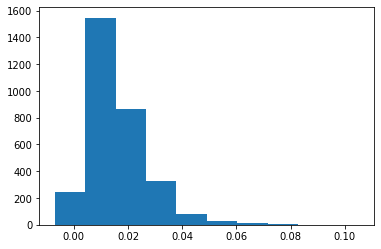

In [39]:
plt.hist(covid_tf['mortality']);

In [32]:
demo = pd.read_csv('New Project 2_Ranking_2022-10-27_17-24-28.csv')
demo.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 280 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

In [36]:
demo_clean.iloc[:,2:]

,"# Age | Under 5 years, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]",...,"# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years | 30 to 59 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years | 60 years and over, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent not responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years | 60 years and over, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent not responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years | 30 to 59 years, 2020 [Estimated]"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,N

In [41]:
demo_clean = demo.drop(demo.columns[[1,2,3,4,5,6,7,21,22]],axis=1)
demo_clean.info(verbose=True)
demo_clean.iloc[:,2:] = demo_clean.iloc[:,2:].div(demo_clean.iloc[:,1],axis=0)
demo_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 271 columns):
 #    Column                                                                                                                                                                                                                                                                                                                                                    Dtype  
---   ------                                                                                                                                                                                                                                                                                                                                                    -----  
 0    Name                                                                                                                                                                  

,Name,"# Total Population, 2020 [Estimated]","# Age | Under 5 years, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]",...,"# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years | 30 to 59 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent responsible for own grandchildren under 18 years | 60 years and over, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | With any disability | Grandparent not responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years | 60 years and over, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent not responsible for own grandchildren under 18 years, 2020 [Estimated]","# Disability Status Of Grandparents Living With Own Grandchildren Under 18 Years By Responsibility For Own Grandchildren And Age Of Grandparent [B10052] | Civilian grandparents living with own grandchildren under 18 years | No disability | Grandparent responsible for own grandchildren under 18 years | 30 to 59 years, 2020 [Estimated]"
0,"Abbeville County, SC",24494.0,0.051972,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,...,0.004246,0.000408,0.000367,0.000041,0.003797,0.012942,0.005757,0.002205,0.007022,0.003511
1,"Acadia Parish, LA",62669.0,0.070210,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,...,0.008202,0.003750,0.001324,0.002378,0.004388,0.013962,0.008138,0.004739,0.005744,0.003319
2,"Accomack County

In [42]:
demo_selected = demo_clean.loc[:,demo_clean.columns.str.contains('# Age')]
demo_selected

,"# Age | Under 5 years, 2020 [Estimated]","# Age | 5 to 9 years, 2020 [Estimated]","# Age | 10 to 14 years, 2020 [Estimated]","# Age | 15 to 17 years, 2020 [Estimated]","# Age | 18 and 19 years, 2020 [Estimated]","# Age | 20 to 24 years, 2020 [Estimated]","# Age | 25 to 34 years, 2020 [Estimated]","# Age | 35 to 44 years, 2020 [Estimated]","# Age | 45 to 54 years, 2020 [Estimated]","# Age | 55 to 64 years, 2020 [Estimated]","# Age | 65 to 74 years, 2020 [Estimated]","# Age | 75 to 84 years, 2020 [Estimated]"
0,0.051972,0.050829,0.063852,0.037397,0.030048,0.067894,0.101617,0.103699,0.123867,0.143505,0.128685,0.062097
1,0.070210,0.071614,0.074231,0.042924,0.023425,0.059663,0.134038,0.118480,0.119038,0.126378,0.086422,0.044376
2,0.058478,0.061614,0.058663,0.034343,0.015127,0.059493,0.106841,0.098693,0.112283,0.158370,0.130177,0.062629
3,0.056747,0.063799,0.072117,0.044368,0.026192,0.061928,0.140647,0.137781,0.126969,0.119636,0.088632,0.039822
4,0.056999,0.056856,0.063460,0.038478,0.014788,0.050251,0.110840,0.102513,0.113424,0.159081,0.104092,0.067624
...,...,...,...,...,...,...,...,...,...,...,...,...
3217,0.071184,0.069376,0.068964,0.041087,0.028750,0.086206,0.137956,0.107015,0.100388,0.095645,0.090418,0.073176
3218,0.067503,0.069609,0.086861,0.036911,0.014945,0.060481,0.119358,0.102006,0.123470,0.119057,0.098997,0.050953
3219,0.088198,0.123311,0.068483,0.047861,0.020343,0.081998,0.116483,0.121778,0.100320,0.075310,0.077330,0.051623
3220,0.074429,0.091714,0.083692,0.044823,0.016788,0.104780,0.123801,0.113877,0.106186,0.093533,0.082699,0.037215


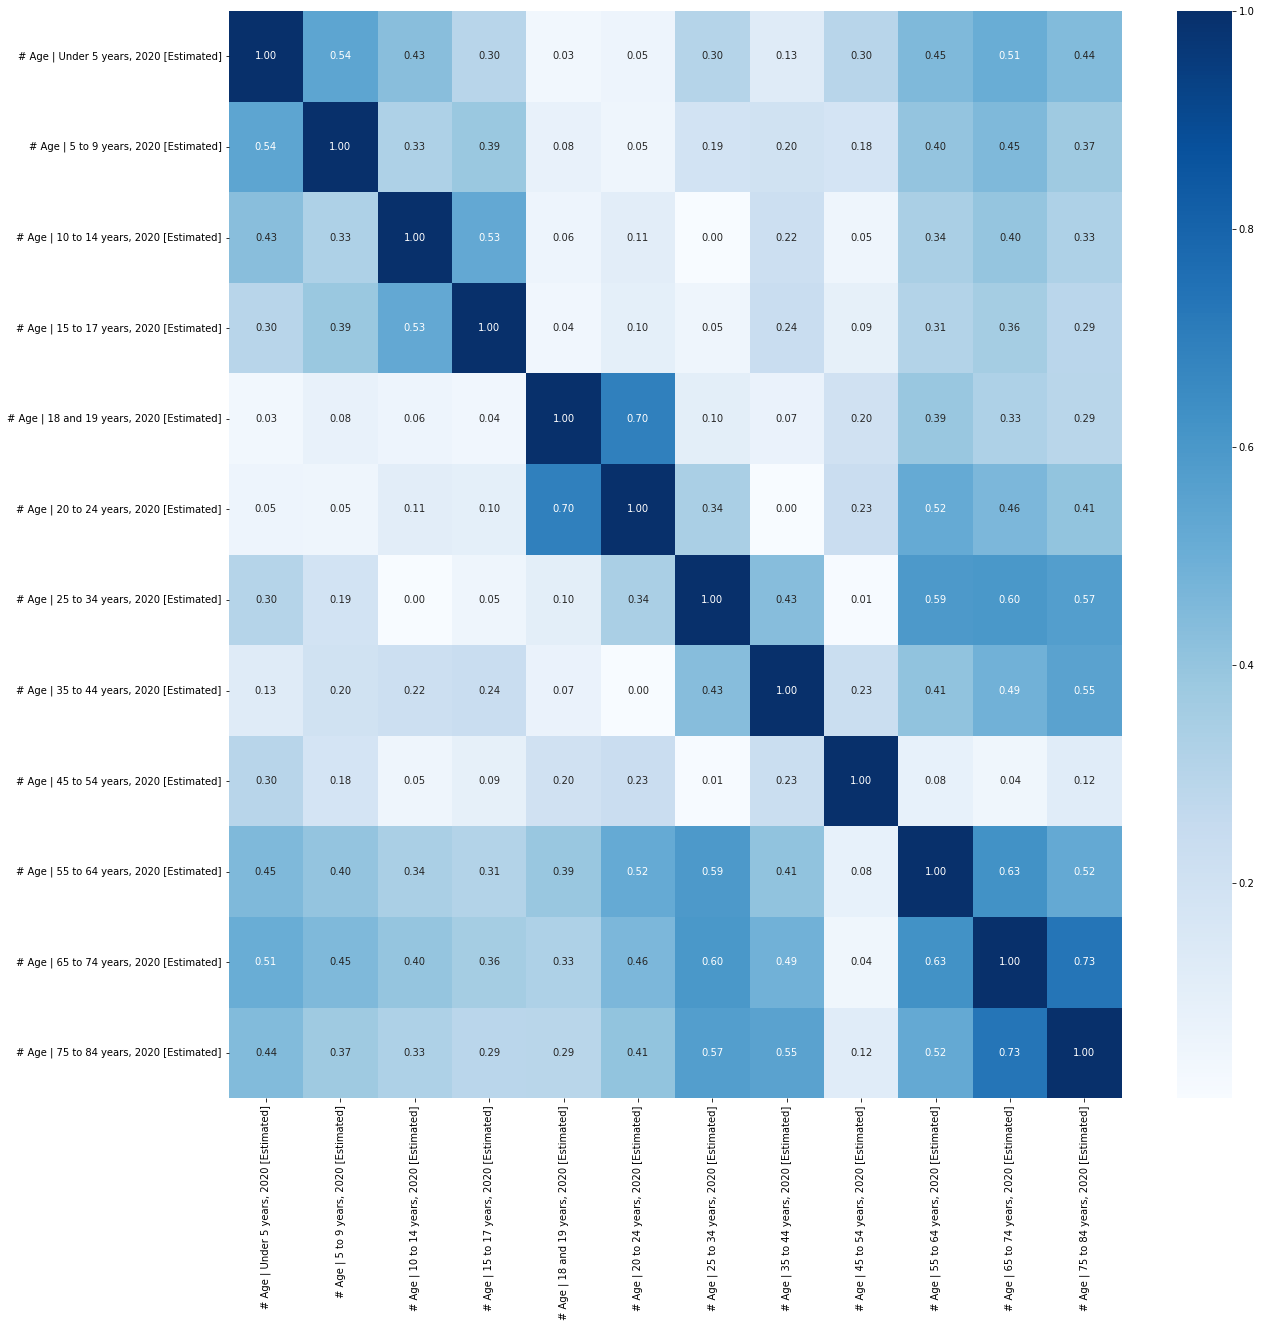

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(demo_selected.corr()),annot=True, fmt=".2f",cmap='Blues');